# WeatherPy 

In [1]:
import requests
from config import api_key
from citipy import citipy
import random as rand
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Generate random cities

In [2]:
cities = []
while len(cities)<650:
    lat = round(rand.uniform(-90,90),2)
    long = round(rand.uniform(-180,180),2)
    city = citipy.nearest_city(lat,long).city_name
    if city not in cities:
        cities.append(city)

# make sure no duplicates
if len(cities) == len(set(cities)):
    print(f'{len(cities)} unique cities generated.')

650 unique cities generated.


## Get current weather for each city from [OpenWeather](https://openweathermap.org/api) and create DataFrame

In [3]:
column_names = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
df = pd.DataFrame(columns = column_names)

series = 1
record = 1
data_gathered_date = ''
for city in cities:
    if (series == 1) & (record == 1):
        print('Beginning Data Retrieval')
        print('------------------------')
        data_gathered_date = date.today().strftime('%m/%d/%Y')
    try:
        res = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}').json()
        name = res['name']
        lat = res['coord']['lat']
        long = res['coord']['lon']
        max_tmp = res['main']['temp_max']
        humid = res['main']['humidity']
        cloud = res['clouds']['all']
        wind = res['wind']['speed']
        country = res['sys']['country']
        date = res['dt']
        df.loc[len(df.index)] = [name,lat,long,max_tmp,humid,cloud,wind,country,date]
        print(f'Processing Record {record} of set {series} | {city.title()}')
    except Exception as e:
        print(f'{city.title()} not found. Skipping...')
    if (record == 50) & (series == 13):
        print('------------------------')
        print('Data Retrieval Complete')
        print('------------------------')
    if record == 50:
        record = 1
        series += 1
    else:
        record +=1

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | Cape Town
Processing Record 2 of set 1 | Hobart
Processing Record 3 of set 1 | Castro
Processing Record 4 of set 1 | Butaritari
Processing Record 5 of set 1 | Xifeng
Processing Record 6 of set 1 | Chokurdakh
Processing Record 7 of set 1 | Rikitea
Processing Record 8 of set 1 | Port Blair
Processing Record 9 of set 1 | Saint-Philippe
Processing Record 10 of set 1 | Skaelskor
Processing Record 11 of set 1 | Novovarshavka
Processing Record 12 of set 1 | Busselton
Processing Record 13 of set 1 | Ambilobe
Processing Record 14 of set 1 | Yellowknife
Processing Record 15 of set 1 | Bingol
Processing Record 16 of set 1 | Ushuaia
Processing Record 17 of set 1 | Santiago De Cao
Processing Record 18 of set 1 | Airai
Processing Record 19 of set 1 | Coquimbo
Processing Record 20 of set 1 | Punta Arenas
Processing Record 21 of set 1 | Bredasdorp
Processing Record 22 of set 1 | Zasechnoye
Processing Record 23 of set 1 | 

Processing Record 3 of set 5 | Deputatskiy
Processing Record 4 of set 5 | Fereydunshahr
Processing Record 5 of set 5 | Grand Gaube
Processing Record 6 of set 5 | Shenjiamen
Tongsa not found. Skipping...
Processing Record 8 of set 5 | Aylmer
Processing Record 9 of set 5 | Saint-Georges
Processing Record 10 of set 5 | Calama
Processing Record 11 of set 5 | Basqal
Processing Record 12 of set 5 | Kodiak
Linshu not found. Skipping...
Processing Record 14 of set 5 | Salalah
Processing Record 15 of set 5 | Flin Flon
Attawapiskat not found. Skipping...
Processing Record 17 of set 5 | Poole
Processing Record 18 of set 5 | Georgetown
Processing Record 19 of set 5 | Baker City
Processing Record 20 of set 5 | Brazzaville
Processing Record 21 of set 5 | Khatanga
Processing Record 22 of set 5 | Houston
Processing Record 23 of set 5 | Yarada
Processing Record 24 of set 5 | Xuddur
Processing Record 25 of set 5 | Geraldton
Processing Record 26 of set 5 | Ancud
Processing Record 27 of set 5 | Sola
Proce

Processing Record 9 of set 9 | Chumikan
Processing Record 10 of set 9 | Frutigen
Processing Record 11 of set 9 | Lavrentiya
Processing Record 12 of set 9 | Bauska
Rungata not found. Skipping...
Processing Record 14 of set 9 | Uddevalla
Processing Record 15 of set 9 | Lityn
Processing Record 16 of set 9 | Joensuu
Processing Record 17 of set 9 | Vila Velha
Processing Record 18 of set 9 | Keti Bandar
Processing Record 19 of set 9 | Prieska
Saleaula not found. Skipping...
Processing Record 21 of set 9 | Talcahuano
Processing Record 22 of set 9 | Berlevag
Processing Record 23 of set 9 | Vallenar
Processing Record 24 of set 9 | Pangkalanbuun
Processing Record 25 of set 9 | Ewa Beach
Processing Record 26 of set 9 | Cap Malheureux
Processing Record 27 of set 9 | Yarmouth
Toliary not found. Skipping...
Processing Record 29 of set 9 | Tongling
Processing Record 30 of set 9 | Ramhormoz
Processing Record 31 of set 9 | Carpinteria
Processing Record 32 of set 9 | Pangody
Processing Record 33 of set 

Processing Record 9 of set 13 | South Shields
Processing Record 10 of set 13 | Qostanay
Processing Record 11 of set 13 | Mantua
Processing Record 12 of set 13 | Heze
Processing Record 13 of set 13 | Deniliquin
Processing Record 14 of set 13 | Shancheng
Processing Record 15 of set 13 | Bonanza
Processing Record 16 of set 13 | Black River
Processing Record 17 of set 13 | Nelson Bay
Palabuhanratu not found. Skipping...
Processing Record 19 of set 13 | Necochea
Processing Record 20 of set 13 | Eyl
Processing Record 21 of set 13 | Alekseyevsk
Processing Record 22 of set 13 | Coolum Beach
Processing Record 23 of set 13 | Onguday
Processing Record 24 of set 13 | Kibaya
Processing Record 25 of set 13 | Ecoporanga
Processing Record 26 of set 13 | Bara
Processing Record 27 of set 13 | Heihe
Bolsheustikinskoye not found. Skipping...
Processing Record 29 of set 13 | Trinidad
Processing Record 30 of set 13 | Spearfish
Processing Record 31 of set 13 | Danville
Processing Record 32 of set 13 | Buin
P

## Export data to [city_weather.csv](output/city_weather.csv)

In [4]:
df.to_csv('output/city_weather.csv')

In [5]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,89.01,42,0,11.50,ZA,1616508918
1,Hobart,-42.8794,147.3294,64.00,88,40,6.91,AU,1616509005
2,Castro,-24.7911,-50.0119,77.40,63,37,3.83,BR,1616509056
3,Butaritari,3.0707,172.7902,81.25,79,35,20.58,KI,1616508915
4,Xifeng,42.7372,124.7222,45.01,42,100,2.71,CN,1616509057


In [6]:
df[['Humidity','Cloudiness','Date']] = df[['Humidity','Cloudiness','Date']].apply(pd.to_numeric)
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,21.284866,17.416772,57.218169,68.452542,53.457627,8.625712,1.616509e+09
std,32.709547,91.953542,27.744007,22.908401,39.794729,6.063725,9.119647e+01
min,-54.800000,-179.166700,-36.110000,4.000000,0.000000,0.340000,1.616509e+09
25%,-3.688225,-68.460875,41.000000,56.000000,10.000000,4.237500,1.616509e+09
50%,26.172850,23.936350,64.000000,73.000000,67.000000,7.080000,1.616509e+09
75%,48.725000,100.251550,79.000000,87.000000,92.500000,11.500000,1.616509e+09
max,78.218600,178.416700,109.400000,100.000000,100.000000,35.680000,1.616509e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
humidity = df['Humidity']
too_humid = [x for x in humidity if x > 100]
if not too_humid:
    print('No cities in the data have a humidity > 100%.')

def style_specific_cell(x):

    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[7, 3] = color
    return df1

df2 = df.describe().style.apply(style_specific_cell, axis=None)
df2

No cities in the data have a humidity > 100%.


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,21.284866,17.416772,57.218169,68.452542,53.457627,8.625712,1616509105.676271
std,32.709547,91.953542,27.744007,22.908401,39.794729,6.063725,91.196472
min,-54.800000,-179.166700,-36.110000,4.000000,0.000000,0.340000,1616508711.000000
25%,-3.688225,-68.460875,41.000000,56.000000,10.000000,4.237500,1616509065.250000
50%,26.172850,23.936350,64.000000,73.000000,67.000000,7.080000,1616509122.000000
75%,48.725000,100.251550,79.000000,87.000000,92.500000,11.500000,1616509173.750000
max,78.218600,178.416700,109.400000,100.000000,100.000000,35.680000,1616509229.000000


## Scatter Plots

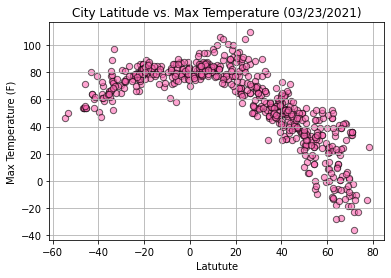

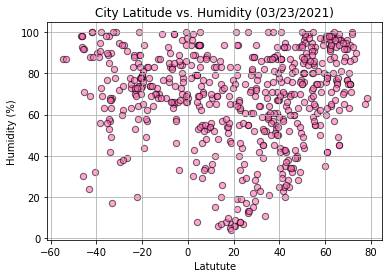

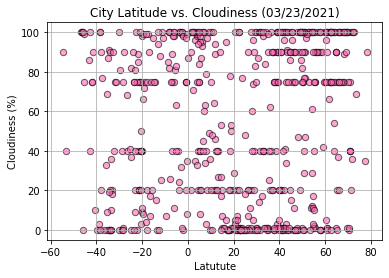

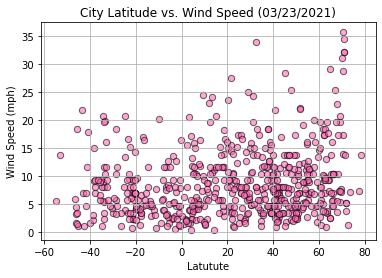

In [8]:
plot_data = [
    {'x':'Lat','y':'Max Temp','title':'Max Temperature','xlabel':'Latutute','ylabel':'Max Temperature (F)'},
    {'x':'Lat','y':'Humidity','title':'Humidity','xlabel':'Latutute','ylabel':'Humidity (%)'},
    {'x':'Lat','y':'Cloudiness','title':'Cloudiness','xlabel':'Latutute','ylabel':'Cloudiness (%)'},
    {'x':'Lat','y':'Wind Speed','title':'Wind Speed','xlabel':'Latutute','ylabel':'Wind Speed (mph)'}
]

def create_plot(x,y,title,xlabel,ylabel,index):    
    df.plot.scatter(x,y,title=f'City Latitude vs. {title} ({data_gathered_date})',c='hotpink',s=40,alpha=.6,edgecolors='black',grid=True);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'output/fig{index}.png')
    
for i, data in enumerate(plot_data):
    create_plot(data['x'],data['y'],data['title'],data['xlabel'],data['ylabel'],i+1)

### Analysis of Scatter plots
* **Temperature (F) vs. Latitude**
    * The temperature of cities seems to increase the closer they are to the Equator and decrease the futher they are.
* **Humidity (%) vs. Latitude**
    * There does'nt seem to be a correlation between humidity and latitude. However cities with the lowest humidity (below 20%) seem to be clustered around 20 degrees of latitude.
* **Cloudiness (%) vs. Latitude**
    * There does not appear to be any correlation between cloudiness and latitude.
* **Wind Speed (mph) vs. Latitude**
    * There does not appear to be any correlation between wind speed and latitude.

## Linear Regression

In [9]:
northern_df = df.loc[df['Lat'] > 0]
southern_df = df.loc[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.758930976368001


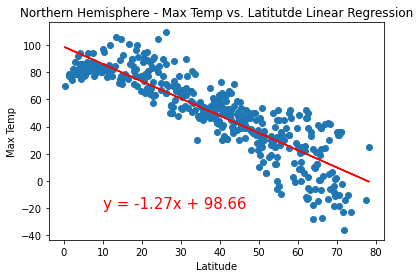

In [10]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.4294766277569719


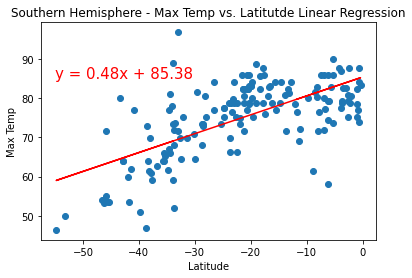

In [11]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.08908953865876532


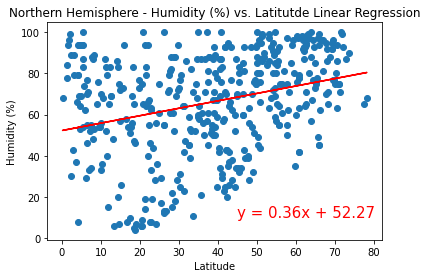

In [12]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 9.232538675554929e-05


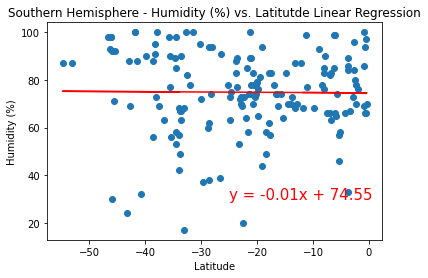

In [13]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03676697967583752


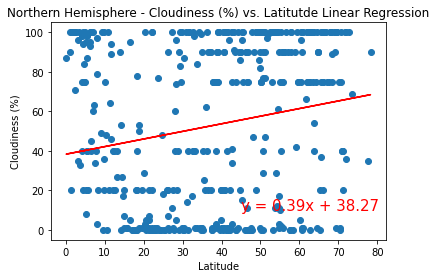

In [14]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.011975656637073402


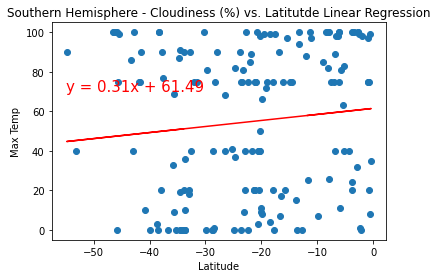

In [15]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.024771542467018428


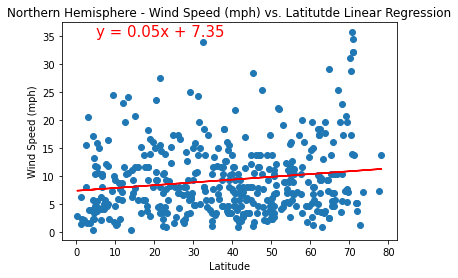

In [16]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.02084511272168269


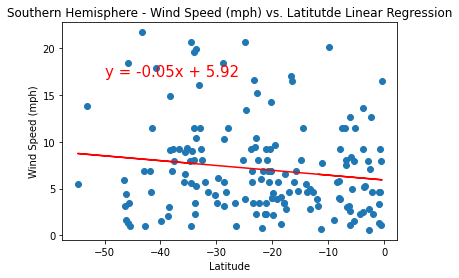

In [17]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitutde Linear Regression')
print(f"The r-squared value is: {rvalue**2}")
plt.show()